#### >>Reading the DATASET 

In [6]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('out.csv')
df = df.iloc[:,1:]

##### >> Normalize the features

In [2]:
# Normalize the features
df.iloc[:, :] = (df - df.mean())/df.std()
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,-0.866697,-0.398728,-1.447430,-0.979812,-0.915406,-0.087171,-0.305752,-0.558823,-0.658666,-0.352564
1,-0.005688,-0.398728,0.175603,0.533622,0.936484,-0.087171,-0.305752,-0.558823,0.245136,1.161541
2,-0.980827,-1.473925,-1.447430,-1.426221,-0.915406,-0.087171,-0.305752,-1.409554,-0.658666,1.283507
3,0.174086,0.676469,1.149422,-0.130547,-0.915406,-0.087171,-0.305752,-0.558823,1.397483,-0.283281
4,-0.081956,-0.398728,-0.149004,-0.435412,-0.915406,-0.087171,-0.305752,0.291909,-0.658666,0.409541
...,...,...,...,...,...,...,...,...,...,...
21608,-0.490533,-0.398728,0.500209,-0.598732,2.788374,-0.087171,-0.305752,0.291909,-0.658666,1.004935
21609,-0.381579,0.676469,0.500209,0.250534,0.936484,-0.087171,-0.305752,0.291909,-0.658666,-0.356172
21610,-0.375856,-1.473925,-1.772037,-1.154021,0.936484,-0.087171,-0.305752,-0.558823,-0.658666,0.247882
21611,-0.381579,-0.398728,0.500209,-0.522516,0.936484,-0.087171,-0.305752,0.291909,-0.658666,-0.184410


#### setup the X Features and y target

In [34]:
x = df.iloc[:,1:]
X = np.hstack((np.ones((x.shape[0],1)), x))

Y = df.iloc[:1001,0]  #Y = price

#### > Importing the polynomial converter of dataset

In [35]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2,include_bias=True) #--> X has 5 cols + onescol = (1 | x^1 | x^2| .. | x^5)


X_polynomial = polynomial_converter.fit_transform(x)
X_polynomial = X_polynomial[:1001,:]
X_polynomial.shape

(1001, 55)

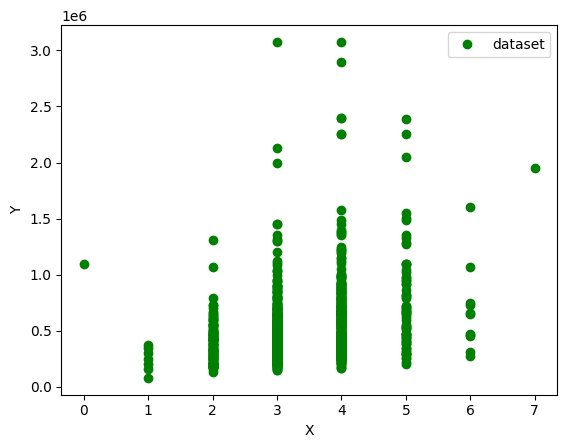

In [36]:
plt.plot(X_polynomial[:,1], Y, "o", color='green', label="dataset")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### Dividing the dataset into X_test, X_train, Y_test and Y_train

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_polynomial, Y, test_size=0.3, random_state=101)
#test_size=0.3 --> 30% of X and Y are X_test & y_test | 70% of X_polly and Y are X_train & y_train
X_test.shape

(301, 55)

#### >> Setup the model usign sckitlean library

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

#### >> Training phase 

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
yHat_train =  model.predict(X_train)
yHat_test =  model.predict(X_test)

#### Display the graph that compares yHat_train with y_train 

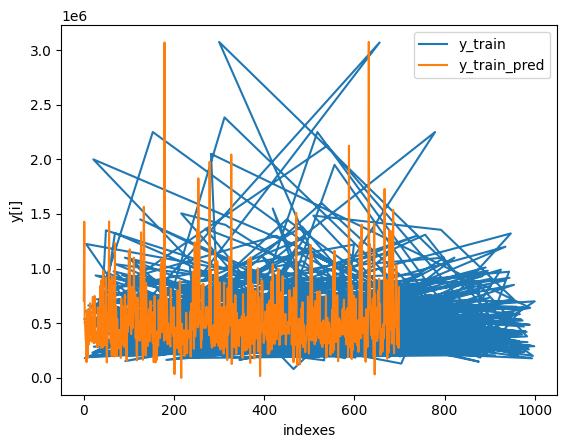

In [41]:
plt.plot(y_train, label='y_train')
plt.plot(yHat_train, label='y_train_pred')
plt.xlabel('indexes')
plt.ylabel('y[i]')
plt.legend()
plt.show()

#### Cost functions : AED , MSE , RMSE

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
MAE = mean_absolute_error(y_train,yHat_train)
MSE = mean_squared_error(y_train,yHat_train)
RMSE = np.sqrt(MSE)
print(">> MSE : ",MSE , " | RMSE : ",RMSE)
print(">> Accuracy : ",r2_score(y_train,yHat_train)*100,"%")
print(">> Accuracy : ",r2_score(y_test,yHat_test)*100,"%")

>> MSE :  23988575110.154427  | RMSE :  154882.4557855228
>> Accuracy :  79.59101609139134 %
>> Accuracy :  66.8431516008591 %


1.0